In [1]:
import pandas as pd
df = pd.read_excel('fanpage_clean.xlsx')

In [2]:
df.head(1)

,id,context,time,shares,likes,love,wow,haha,angry,sad,comments,likes_count,curator,hour,weekday
0,124616330906800_1560501197318299,阿娘威！披羊皮的狼？竟大口嚼小雞\n#要打統編：小編真的是快嚇死了...😬😬\n\n影片來源...,2017-06-05 11:09:40,560,1144,11,757,21,292,86,589,2311,要打統編,11,Monday


# Data Modeling

資料前處理

使用分享數、留言數、小編、發文時間、發文星期預測按讚數量

In [3]:
X = df[['shares','comments','curator','hour','weekday']]
y = df['likes_count']

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9975 entries, 0 to 9974
Data columns (total 5 columns):
shares      9975 non-null int64
comments    9975 non-null int64
curator     7232 non-null object
hour        9975 non-null int64
weekday     9975 non-null object
dtypes: int64(3), object(2)
memory usage: 389.7+ KB


In [5]:
X['curator'] = X['curator'].fillna('未知')

/Users/andy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9975 entries, 0 to 9974
Data columns (total 5 columns):
shares      9975 non-null int64
comments    9975 non-null int64
curator     9975 non-null object
hour        9975 non-null int64
weekday     9975 non-null object
dtypes: int64(3), object(2)
memory usage: 389.7+ KB


資料標準化

In [7]:
from sklearn import preprocessing
standard = preprocessing.StandardScaler()
X[['shares','comments']] = standard.fit_transform(X[['shares','comments']])

/Users/andy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/andy/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


將類別型資料轉為Dummy值

In [8]:
X_1 = pd.get_dummies(X)

In [9]:
X_1.head()

,shares,comments,hour,curator_BG編,curator_B編,curator_M編,curator_七條編,curator_人間四月編,curator_什麼編,curator_傻編,...,curator_高光編,curator_魚骨編,curator_鴨編,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0.241213,0.001331,11,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.212199,-0.206505,11,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.677548,0.564335,10,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.224154,-0.215934,10,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.212199,-0.208076,10,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Training & Testing data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.3, random_state = 2)

# 預測模型 - 迴歸 Regression

Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [21]:
lm.fit(X_train.values, y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print(lm.intercept_)

3620.626025474225


In [23]:
print(lm.coef_)

[ 3.00462596e+03  4.72062851e+03  2.01721953e+01 -2.28276444e+03
  2.07920813e+03  1.48858548e+02 -1.46823617e+03 -2.81825555e+03
  3.51436775e+03 -1.33455026e+03  4.27693492e+02  3.67418636e+02
 -1.60739471e+03 -3.07750639e+02 -1.51851326e+03  1.48574584e+03
  4.98227663e+03 -2.36620899e+01  1.67287036e+03  1.01151796e+03
 -1.55317300e+03 -4.24150315e+02  4.45541144e+03  7.65987465e+03
 -5.76397787e+02 -1.51799158e+03 -2.15215639e+03 -1.75348433e+03
 -7.00398636e+02 -1.70082134e+03 -3.73933534e+02 -9.39178182e+02
 -1.74487518e+02  3.34903993e+01 -9.24239906e+01 -1.97503789e+03
  2.87063698e+03 -1.53378732e+03  1.59797270e+04  2.62326036e+03
 -1.51700222e+03 -1.72973614e+03  3.62900435e+03  9.65798300e+02
  4.23670878e+03 -1.87447960e+02  5.86604565e+03 -3.87138329e+03
 -1.58148389e+04 -5.23336428e+02 -1.67667670e+03 -1.90935749e+02
 -2.05228159e+03 -1.69850301e+03 -9.32861046e+02  3.02177646e+02
 -1.60500835e+03 -1.76060345e+03 -3.09648285e+03 -1.87567185e+03
  2.21896830e+04 -1.51722

In [24]:
y_predict = lm.predict(X_test)
pd.DataFrame(list(zip(y_test.values, y_predict)), columns=['Measured','Predicted']).head()

,Measured,Predicted
0,6938,2221.857708
1,860,2083.246286
2,128,273.179627
3,4851,5543.968663
4,491,2672.784547


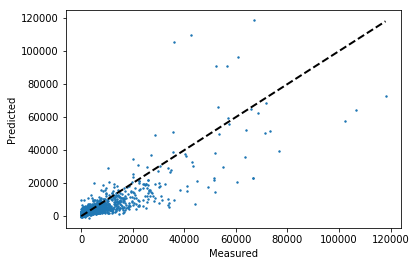

In [25]:
import matplotlib.pyplot as plt
plt.scatter(y_test.values,y_predict,s=2)
plt.plot([y_test.values.min(), y_test.values.max()],
         [y_test.values.min(), y_test.values.max()], 'k--', lw=2)
plt.ylabel('Predicted')
plt.xlabel('Measured')
plt.show()

檢驗迴歸模型

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test.values, y_predict)
print("MSE : ",mse)

MSE :  23446608.538704727


In [51]:
from math import sqrt
rms = sqrt(mean_squared_error(y_test.values, y_predict))
print("RMSE : ",rms)

RMSE :  4842.169817210537


In [52]:
R_2 = lm.score(X_train, y_train) 
print("R-squared  : ",R_2)

R-squared  :  0.6991904295741282


In [53]:
adj_R_2 = R_2 - (1 - R_2) * (X_train.shape[1] / (X_train.shape[0] - X_train.shape[1] - 1))
print("Adjusted R-squared : ",adj_R_2)

Adjusted R-squared :  0.6949518287125203


# Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train.values, y_train.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
y_predict_rfr = rfr.predict(X_test)

In [55]:
pd.DataFrame(list(zip(y_test.values, y_predict_rfr)), columns=['Measured','Predicted']).head()

,Measured,Predicted
0,6938,3221.5
1,860,755.8
2,128,292.6
3,4851,5626.1
4,491,730.9


In [44]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test.values, y_predict_rfr)
print("MSE : ",mse)

MSE :  19021269.861873765


In [48]:
from math import sqrt
rms = sqrt(mean_squared_error(y_test.values, y_predict_rfr))
print("RMSE : ",rms)

RMSE :  4361.338081583881


In [46]:
R_2 = rfr.score(X_train, y_train) 
print("R-squared  : ",R_2)

R-squared  :  0.9449581808295875


In [47]:
adj_R_2 = R_2 - (1 - R_2) * (X_train.shape[1] / (X_train.shape[0] - X_train.shape[1] - 1))
print("Adjusted R-squared : ",adj_R_2)

Adjusted R-squared :  0.9441826060969423
